In [4]:
from google.colab import drive
import pandas as pd

# Getting the data from gdrive

In [5]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!unzip "/content/drive/MyDrive/ASL Dataset/archive (2).zip" -d "/content"

Archive:  /content/drive/MyDrive/ASL Dataset/archive (2).zip
  inflating: /content/amer_sign2.png  
  inflating: /content/amer_sign3.png  
  inflating: /content/american_sign_language.PNG  
  inflating: /content/sign_mnist_test.csv  
  inflating: /content/sign_mnist_test/sign_mnist_test.csv  
  inflating: /content/sign_mnist_train.csv  
  inflating: /content/sign_mnist_train/sign_mnist_train.csv  


In [7]:
train_data=pd.read_csv("/content/sign_mnist_train.csv")

In [8]:
train_data.shape

(27455, 785)

In [9]:
train_data.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195


In [10]:
test_data=pd.read_csv("/content/sign_mnist_test.csv")

In [11]:
test_data.shape

(7172, 785)

In [12]:
test_data.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222


# Creating a word dictionary with indices

In [13]:
L=[]
for i in range(65,91):
  if i==90:
    continue
  else:
    c=chr(i)
    L.append(c) 
print(L)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


In [14]:
word_dict={}
for i in list(range(25)):
  word_dict[i]=L[i]
print(word_dict)

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y'}


# Plotting the data

In [39]:
X_train=train_data.drop(labels = ["label"],axis = 1) 
Y_train=train_data['label']

In [40]:
labels=list(train_data['label'].value_counts().index)

In [41]:
l=[]
for i in labels:
  for j,k in enumerate(train_data['label']):
    if k==i:
      l.append(j)
      break

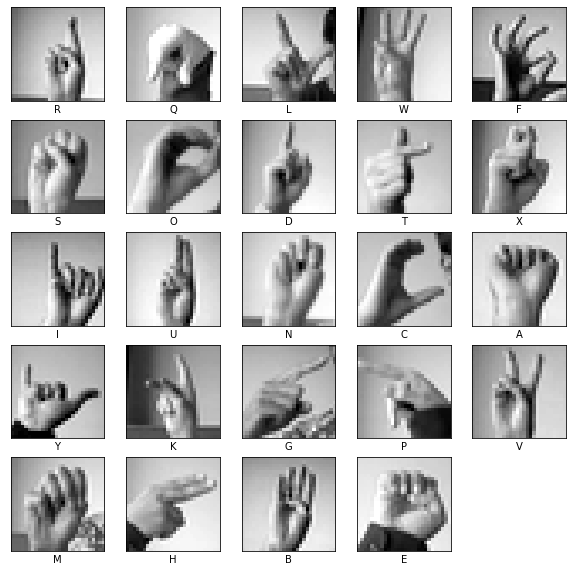

In [43]:
import matplotlib.pyplot as plt

x_train1=X_train.values.reshape(-1,28,28)
plt.figure(figsize=(10,10))
n=1
for i in l:
  plt.subplot(5,5,n)
  plt.xticks([])
  plt.yticks([])
  plt.grid(True)
  plt.imshow(x_train1[i],cmap=plt.get_cmap('gray'))
  plt.xlabel(word_dict[y_train[i]])
  n=n+1
plt.show()  

# Data Preprocessing

In [44]:
our_train = train_data.append(test_data)

In [45]:
our_train.shape

(34627, 785)

In [ ]:
our_train_x = our_train.drop(labels = ["label"],axis = 1) 

In [ ]:
our_train_y=our_train['label']

In [ ]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
our_train_y = to_categorical(our_train_y, num_classes = 25)

In [ ]:
our_train_y

In [ ]:
#rescaling

our_train_x=our_train_x/255

In [ ]:
our_train_x= our_train_x.values.reshape(-1,28,28,1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(our_train_x,our_train_y, test_size =0.4,shuffle=True)

In [ ]:
print("x_train shape",x_train.shape)
print("x_val shape",x_val.shape)
print("y_train shape",y_train.shape)
print("y_val shape",y_val.shape)

x_train shape (20776, 28, 28, 1)
x_val shape (13851, 28, 28, 1)
y_train shape (20776, 25)
y_val shape (13851, 25)


# Creating the model

In [ ]:
import warnings
# filter warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,  BatchNormalization
from tensorflow.keras.layers import  Dropout, Flatten, Dense

In [ ]:
model = Sequential()

#
model.add(Conv2D(filters = 32, kernel_size = (5,5),activation ='relu', input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))
#
model.add(Conv2D(filters = 64, kernel_size = (3,3), 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3), 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))
# fully connected
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(25, activation = "softmax"))


model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
batch_normalization_33 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
batch_normalization_34 (Batc (None, 10, 10, 64)        256       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 5, 5, 64)        

In [ ]:
model.compile(optimizer = 'rmsprop' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
#from keras.callbacks import EarlyStopping
#es1 = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1,restore_best_weights=True)

In [ ]:
epochs = 50 # for better result increase the epochs
batch_size = 50

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=True,  # randomly flip images
        )

In [ ]:
datagen.fit(x_train)

# Trainning the model

In [ ]:
# Fit the model
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),epochs = epochs, validation_data = (x_val,y_val), steps_per_epoch=x_train.shape[0] // batch_size,verbose=2)

Epoch 1/50
415/415 - 10s - loss: 2.4330 - accuracy: 0.2479 - val_loss: 6.0665 - val_accuracy: 0.1050
Epoch 2/50
415/415 - 8s - loss: 1.6376 - accuracy: 0.4533 - val_loss: 0.9580 - val_accuracy: 0.6640
Epoch 3/50
415/415 - 8s - loss: 1.3720 - accuracy: 0.5328 - val_loss: 0.9987 - val_accuracy: 0.6708
Epoch 4/50
415/415 - 9s - loss: 1.2072 - accuracy: 0.5905 - val_loss: 0.4987 - val_accuracy: 0.8285
Epoch 5/50
415/415 - 9s - loss: 1.1203 - accuracy: 0.6213 - val_loss: 0.8700 - val_accuracy: 0.6626
Epoch 6/50
415/415 - 9s - loss: 1.0351 - accuracy: 0.6535 - val_loss: 0.7075 - val_accuracy: 0.7592
Epoch 7/50
415/415 - 9s - loss: 0.9809 - accuracy: 0.6646 - val_loss: 0.7792 - val_accuracy: 0.7334
Epoch 8/50
415/415 - 9s - loss: 0.9187 - accuracy: 0.6894 - val_loss: 0.4334 - val_accuracy: 0.8477
Epoch 9/50
415/415 - 9s - loss: 0.8793 - accuracy: 0.7063 - val_loss: 0.4103 - val_accuracy: 0.8482
Epoch 10/50
415/415 - 9s - loss: 0.8506 - accuracy: 0.7113 - val_loss: 0.3240 - val_accuracy: 0.905

# Saving the model

In [ ]:
model.save_weights('2first_try_MNISTsignlanguage.h5')

In [ ]:
with open('2ASLmnist_model_architecture.json','w') as f:
    f.write(model.to_json())